# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from keras import preprocessing
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# 1. Read csv file and Then call the .info function from Pandas.

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# 2. Display the number of data that are NaN for each column

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# 3

1.   Separate the company name from the CarName column
2.   delete the CarName, car_ID and symbolling columns
3.   Find misspelled words and replace them






In [ ]:
CarName = df["CarName"]
CarName.value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [ ]:
##1
CompanyName = []
for car_name in df['CarName']:
    word = car_name.split()[0] # Split the car name into a list of words using a space as the delimiter and Take the first word
    CompanyName.append(word)

CompanyName = pd.DataFrame(CompanyName)
df.insert (2, "CompanyName", CompanyName[0])

In [ ]:
set(df['CompanyName'])

{'Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porcshce',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

In [ ]:
df

,car_ID,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,volvo 145e (sw),gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,volvo 144ea,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,volvo 244dl,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,volvo 246,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
##2
df=df.drop(['car_ID'],axis=1)
df=df.drop(['symboling'],axis=1)
df=df.drop(['CarName'],axis=1)
df

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
#3
# maxda , mazda
# Nissan , nissan
# porsche , porcshce
# vokswagen , volkswagen , vw
# toyota , toyouta

df['CompanyName'] = df['CompanyName'].str.lower()

df['CompanyName'].replace('maxda','mazda',inplace=True)
df['CompanyName'].replace('porcshce','porsche',inplace=True)
df['CompanyName'].replace('vw','volkswagen',inplace=True)
df['CompanyName'].replace('vokswagen','volkswagen',inplace=True)
df['CompanyName'].replace('toyouta','toyota',inplace=True)

In [ ]:
df

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# 4. Convert descriptive data to numerical data

In [ ]:
dummy = ['doornumber','cylindernumber','CompanyName','fuelsystem','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype']

In [ ]:
df2 = pd.get_dummies(df, columns=dummy, drop_first=True)
df2.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,1,0,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,1,0,0,0,0,1,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,1,0,0,0


# 5. Correlation Matrix

In [ ]:
df2.corr()['price'].sort_values(ascending=False)

price                  1.000000
enginesize             0.874145
curbweight             0.835305
horsepower             0.808139
carwidth               0.759325
                         ...   
fuelsystem_2bbl       -0.501374
drivewheel_fwd        -0.601950
citympg               -0.685751
highwaympg            -0.697599
cylindernumber_four   -0.697762
Name: price, Length: 64, dtype: float64

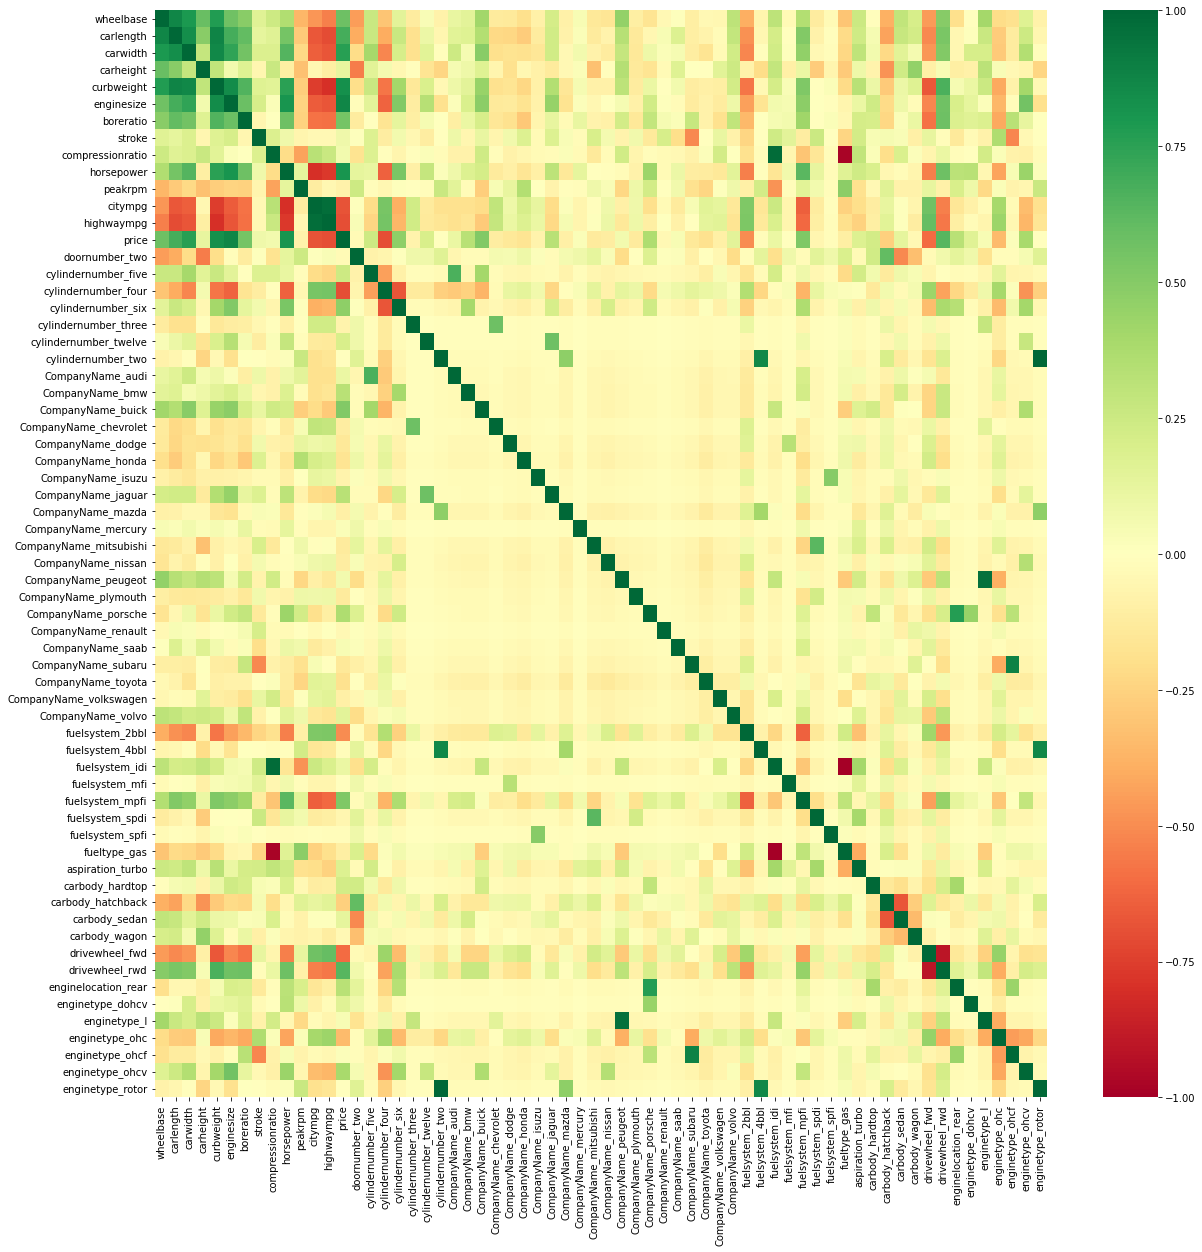

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df2.corr(), cmap="RdYlGn")
plt.show()

In [ ]:
corr=df2.corr()
corr.style.background_gradient(cmap="inferno")

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,doornumber_two,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.447357,0.261182,-0.309492,0.145842,-0.120709,0.037803,-0.081174,0.110017,0.147804,0.408210,-0.127605,-0.133609,-0.191713,-0.092329,0.214573,-0.087050,0.045962,-0.147396,-0.156719,0.453616,-0.105511,-0.170472,-0.043896,0.009927,-0.107161,-0.046785,-0.047664,0.306228,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129,-0.308346,0.257611,-0.008608,-0.386094,0.291086,0.210899,-0.460355,0.498830,-0.187790,-0.004156,0.399603,-0.204037,-0.183195,0.166152,-0.081174
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,-0.398568,0.259894,-0.400210,0.262981,-0.187445,0.100413,-0.057877,0.149405,0.171120,0.347345,-0.218994,-0.227400,-0.280778,-0.117767,0.226930,-0.079248,0.024751,-0.127248,-0.077149,0.330602,-0.139780,-0.048682,0.041138,0.177076,-0.105172,-0.073906,-0.030714,0.285398,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245,-0.212679,0.234539,0.047292,-0.436269,0.269647,0.219683,-0.508714,0.538370,-0.050989,0.009391,0.261715,-0.274413,-0.118320,0.244053,-0.057877
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.207168,0.397690,-0.523135,0.209246,-0.183473,0.153516,-0.013699,0.246588,0.053412,0.485409,-0.194068,-0.174349,-0.185212,-0.155429,0.229246,-0.044906,0.068451,-0.079518,-0.118727,0.276302,-0.143778,0.089564,0.029787,0.048052,-0.111605,-0.164234,-0.033924,0.228758,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158,-0.233880,0.300567,0.066360,-0.222308,0.154637,0.060639,-0.472116,0.511149,-0.051698,0.209136,0.210771,-0.286211,-0.124446,0.348869,-0.013699
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,-0.552208,0.152982,0.059696,-0.049777,-0.015076,-0.170181,-0.238720,0.054281,0.090949,0.165354,-0.066238,-0.182891,-0.051925,-0.086803,-0.129565,-0.045158,0.030881,-0.323726,-0.011652,0.337701,-0.135256,-0.170265,-0.035625,0.169192,0.002570,-0.000530,0.149194,0.245342,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778,-0.284631,0.087311,-0.072328,-0.477476,0.235863,0.459148,-0.100273,0.039814,-0.106234,-0.092628,0.319687,0.036260,-0.046670,-0.065063,-0.238720
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.197379,0.264554,-0.576463,0.405490,-0.143903,0.187964,-0.039196,0.088743,0.145028,0.442556,-0.187364,-0.166769,-0.229843,-0.092904,0.345315,-0.149218,0.047776,-0.086990,-0.092690,0.305064,-0.121164,0.102171,-0.006892,0.063495,-0.114888,-0.094786,-0.101966,0.221127,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052,-0.217275,0.324902,0.098956,

<Axes: >

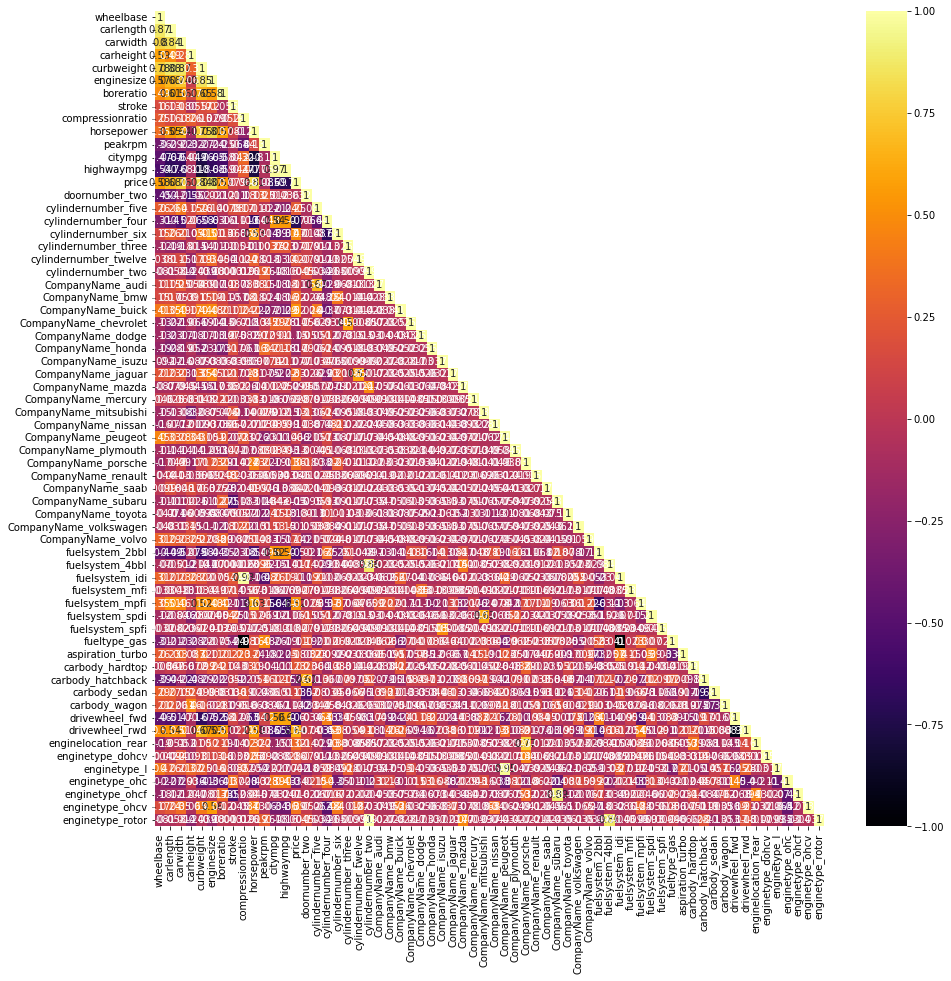

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True,cmap='inferno',mask=np.triu(df2.corr(),k=1))

In [ ]:
num = df.select_dtypes(exclude=['object']).columns
num

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

##**enginsize has the maximum correlation with the price.**

<Axes: >

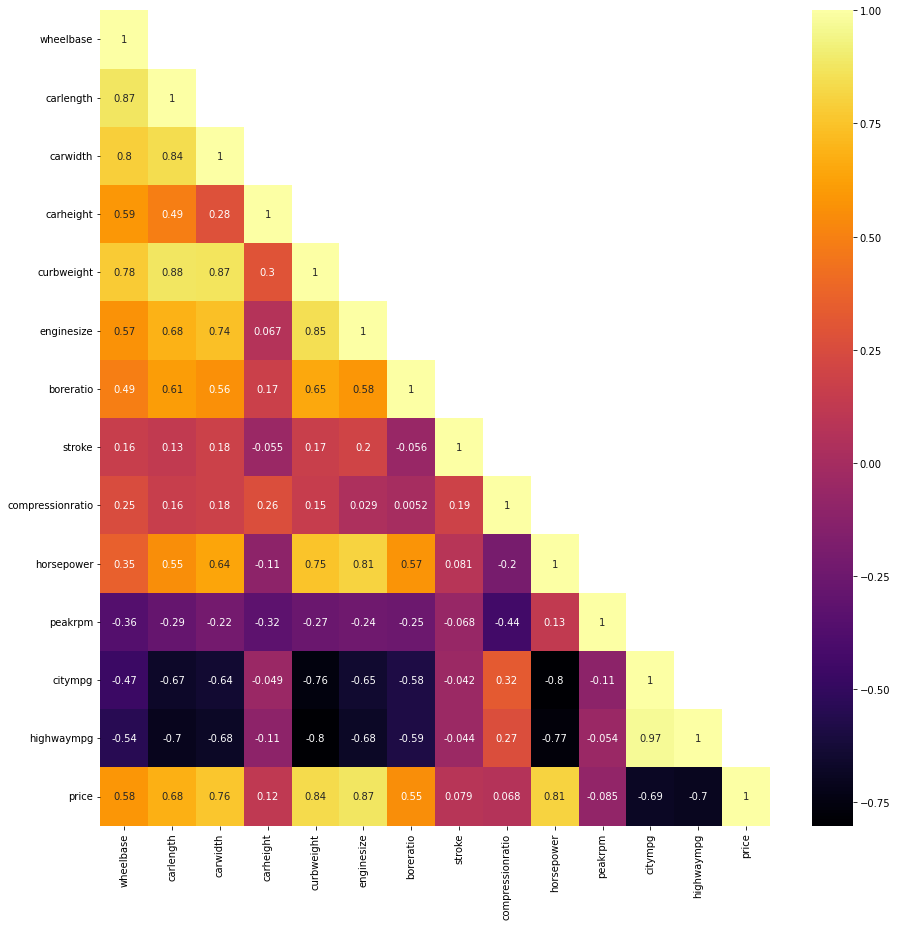

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df[num].corr(),annot=True,cmap='inferno',mask=np.triu(df[num].corr(),k=1))

# Plot Distribution

<ipython-input-37-0254e881a511>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: title={'center': 'Car Price Distribution'}, xlabel='price', ylabel='Density'>

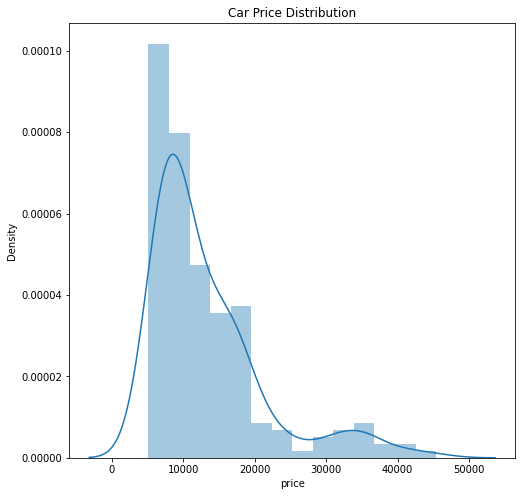

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution')
sns.distplot(df['price'])

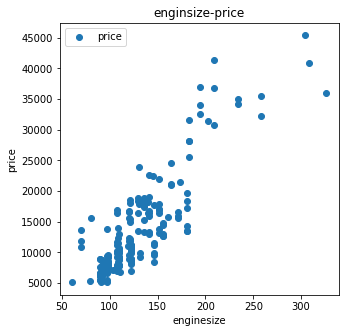

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(x = 'enginesize', y = 'price', data = df2)
plt.xlabel('enginesize')
plt.title('enginsize-price')
plt.ylabel('price')
plt.legend()
plt.show()

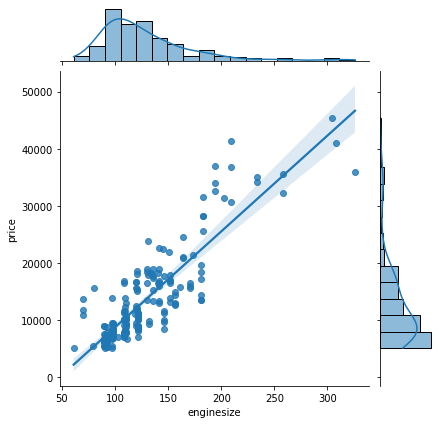

In [ ]:
sns.jointplot(data=df2,x = 'enginesize', y = 'price',kind='reg')
plt.show()

In [ ]:
# carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a poitive correlation with price.
# carheight doesn't show any significant trend with price
# citympg , highwaympg : have a significant negative correlation with price.

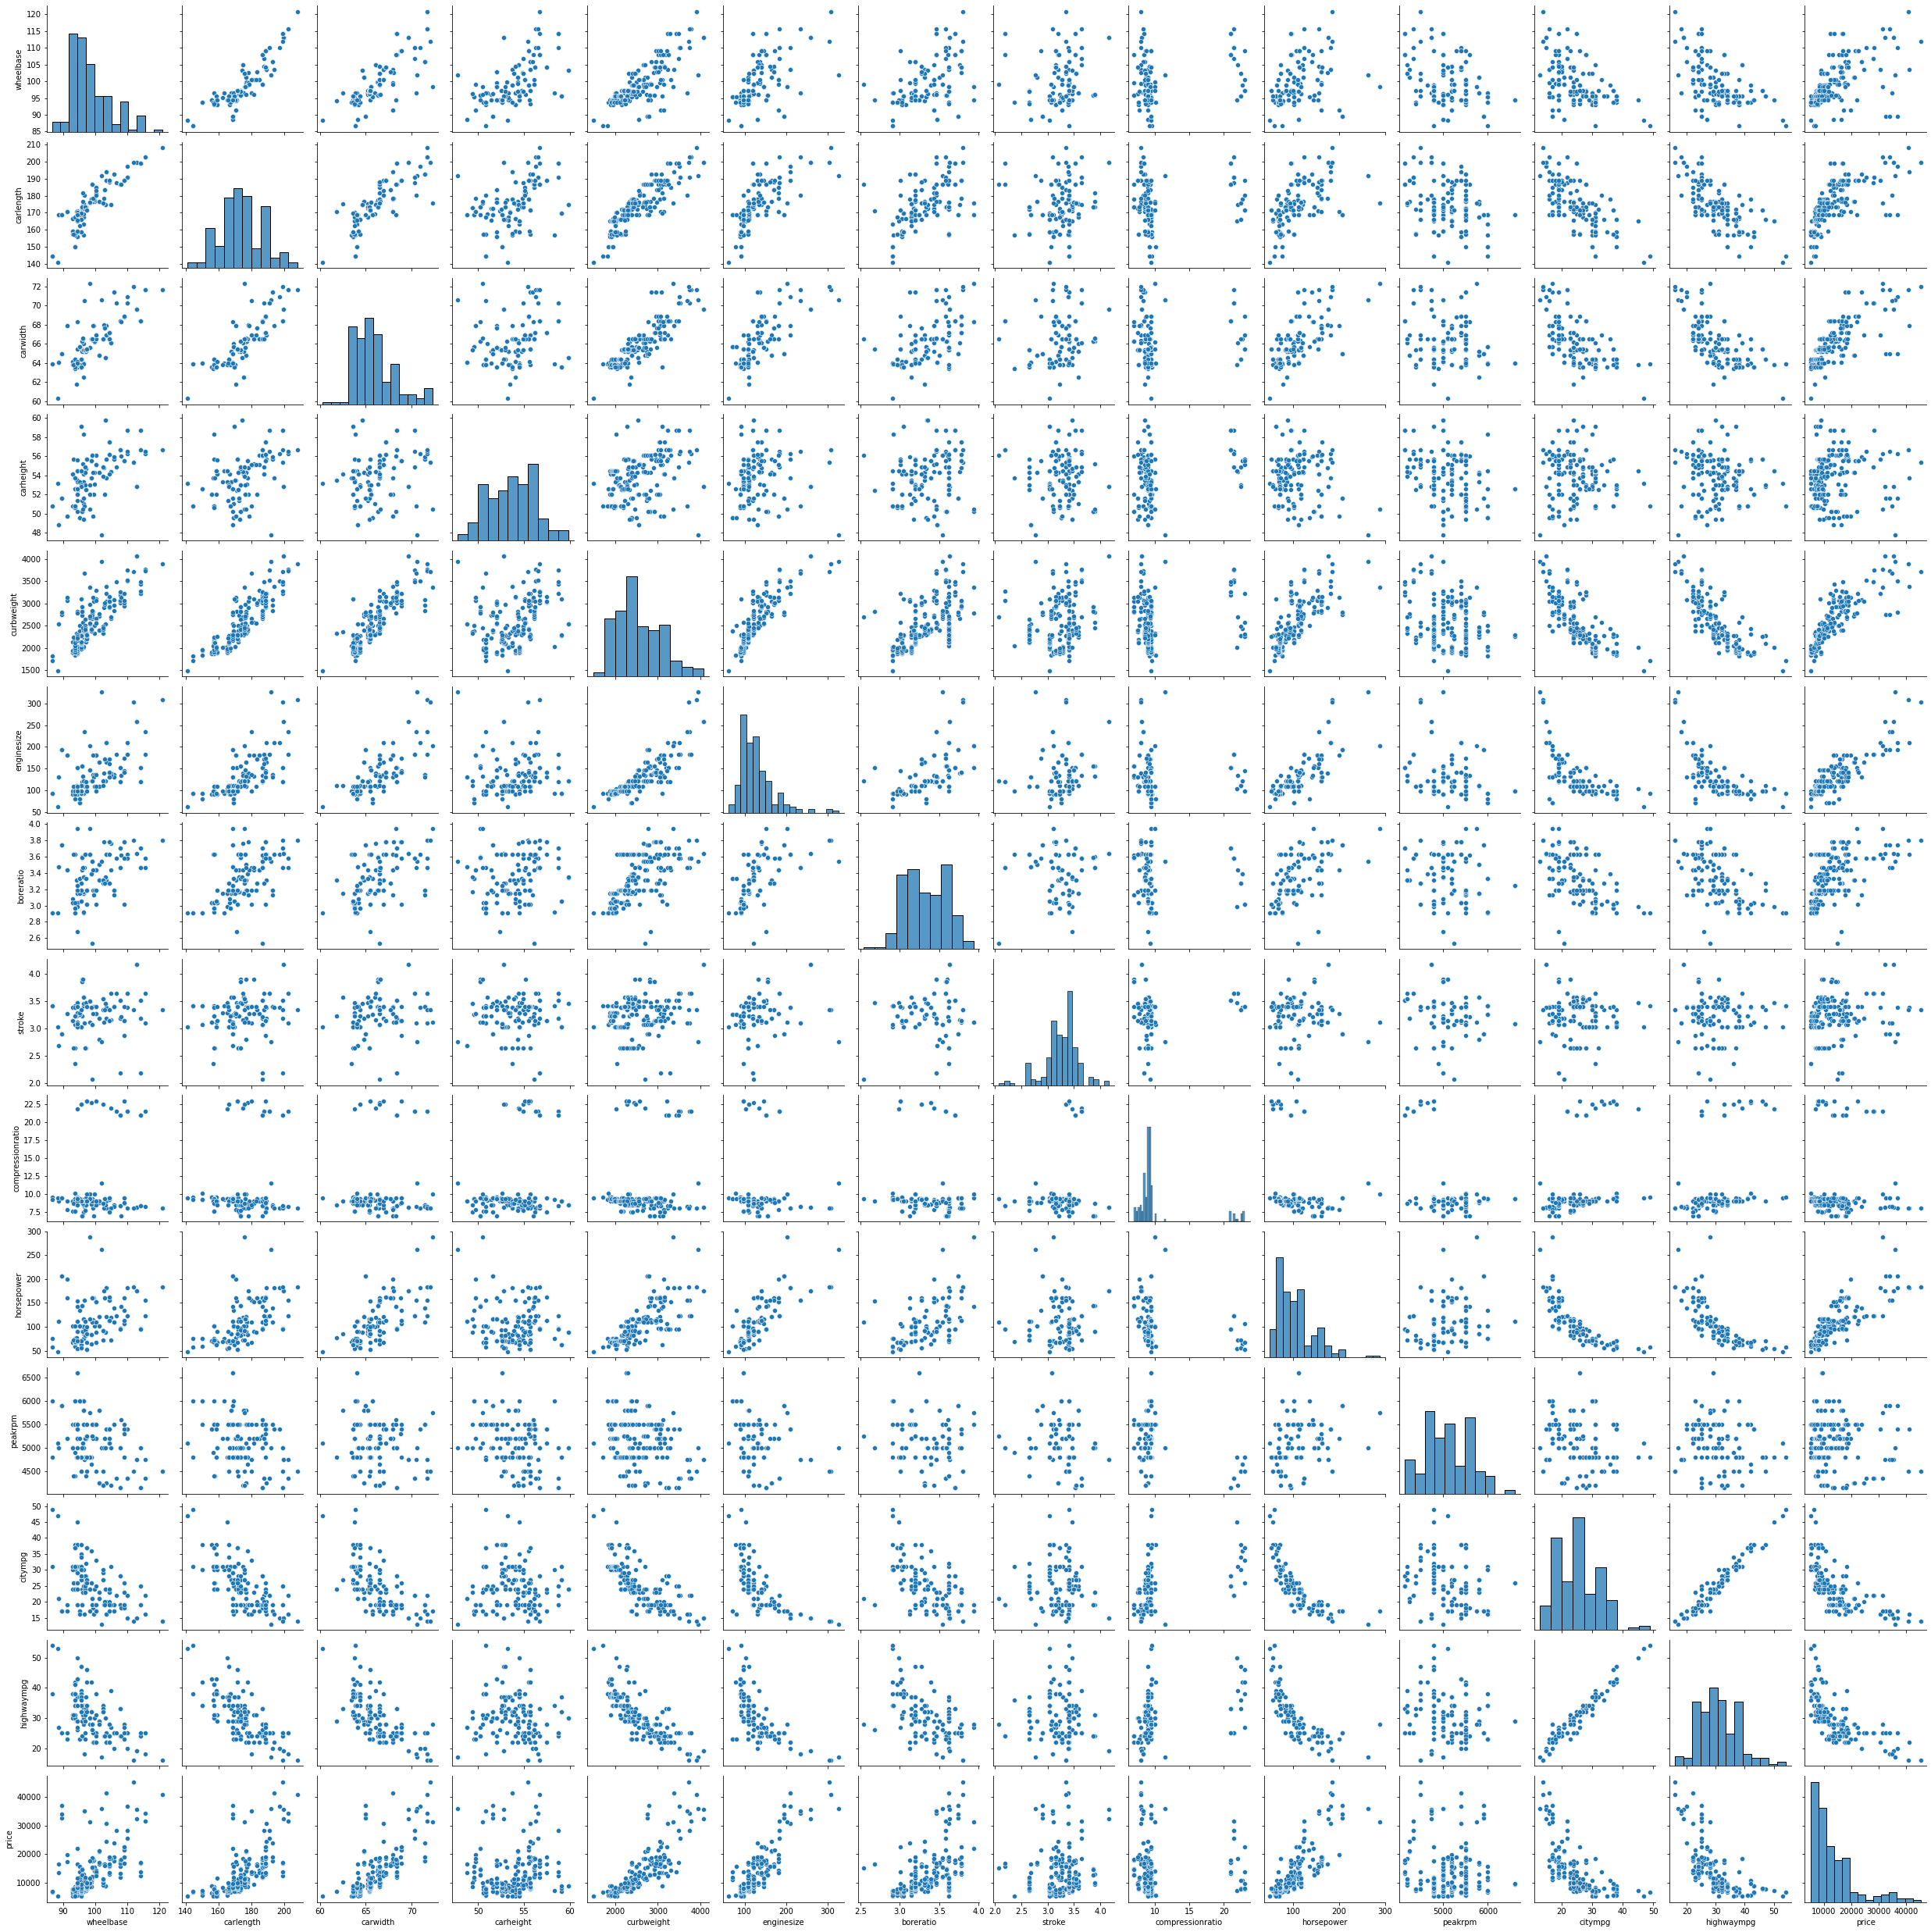

In [ ]:
ax = sns.pairplot(df[num])

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

# Distribution of Numeric Variables

Text(0.5, 1.0, 'price Interval')

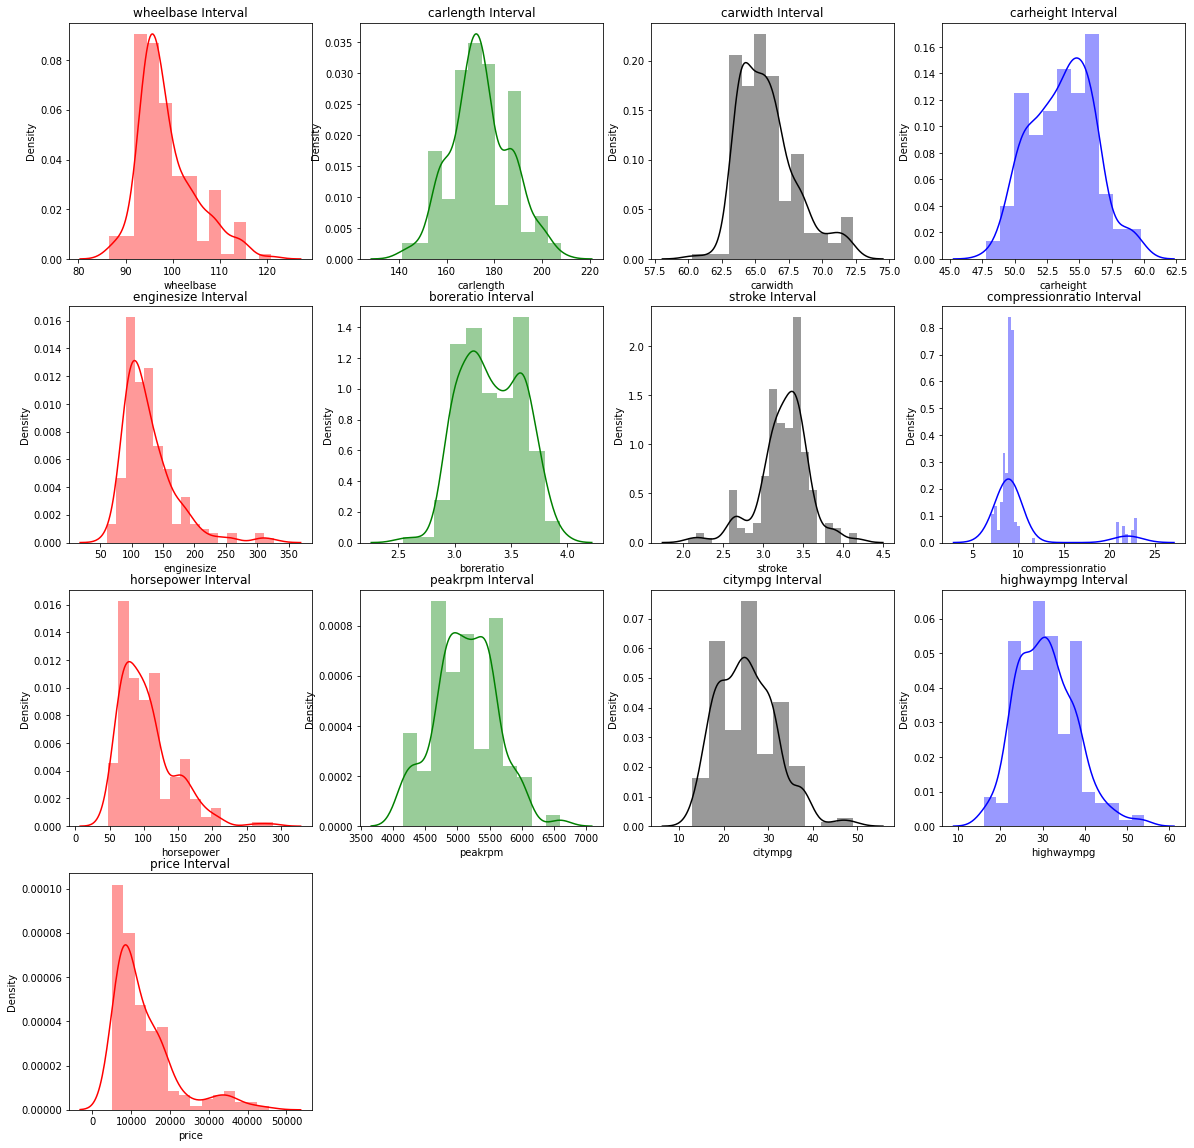

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(4,4,1)
sns.distplot(df['wheelbase'], color="red").set_title('wheelbase Interval')
plt.subplot(4,4,2)
sns.distplot(df['carlength'], color="green").set_title('carlength Interval')
plt.subplot(4,4,3)
sns.distplot(df['carwidth'], color="black").set_title('carwidth Interval')
plt.subplot(4,4,4)
sns.distplot(df['carheight'], color="blue").set_title('carheight Interval')
plt.subplot(4,4,5)
sns.distplot(df['enginesize'], color="red").set_title('enginesize Interval')
plt.subplot(4,4,6)
sns.distplot(df['boreratio'], color="green").set_title('boreratio Interval')
plt.subplot(4,4,7)
sns.distplot(df['stroke'], color="black").set_title('stroke Interval')
plt.subplot(4,4,8)
sns.distplot(df['compressionratio'], color="blue").set_title('compressionratio Interval')
plt.subplot(4,4,9)
sns.distplot(df['horsepower'], color="red").set_title('horsepower Interval')
plt.subplot(4,4,10)
sns.distplot(df['peakrpm'], color="green").set_title('peakrpm Interval')
plt.subplot(4,4,11)
sns.distplot(df['citympg'], color="black").set_title('citympg Interval')
plt.subplot(4,4,12)
sns.distplot(df['highwaympg'], color="blue").set_title('highwaympg Interval')
plt.subplot(4,4,13)
sns.distplot(df['price'], color="red").set_title('price Interval')


# Train-Test split and MinMaxScaler

In [ ]:
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()
df2.to_numpy
for i in df2.columns :
  if df2[i].dtype =='object':
    df2[i] = l1.fit_transform(df2[i])
df2

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,1,0,0,0,0,0,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,1,0,0,0,0,1,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,1,0,0,0,1,0,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,1,0,0,0,1,0,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,1,0,0,0,0,0,1,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
X = df2.drop(["price"],axis = 1)
Y = df2["price"]

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.15 , random_state = 7)

In [ ]:
print("X Train Scaler : ", x_train.shape)
print("X Test Scaler : ", x_test.shape)
print("Y Train Scaler : ", y_train.shape)
print("Y Test  Scaler : ", y_test.shape)

X Train Scaler :  (174, 63)
X Test Scaler :  (31, 63)
Y Train Scaler :  (174,)
Y Test  Scaler :  (31,)


In [ ]:
max_1 = y_train.values
maximum =0
y_test_1 = y_test
minimum = min(y_train)
for i in range(174):
  if max_1[i] > maximum :
    maximum = max_1[i]

In [ ]:
scaler_1 = MinMaxScaler()
x_train =scaler_1.fit_transform(x_train)
x_test =scaler_1.transform(x_test)

In [ ]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
scaler_2 = MinMaxScaler()
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

# Multi-Layer Perceptron

# MLP with 1 hidden layer

In [ ]:
model_1 = Sequential()
model_1.add(Dense(50,activation='relu',input_shape =(x_train.shape[1],)))
model_1.add(Dense(1,activation = 'linear'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                3200      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,251
Trainable params: 3,251
Non-trainable params: 0
_________________________________________________________________


# MLP with 2 hidden layer

In [ ]:
model_2 = Sequential()
model_2.add(Dense(50,activation='linear',input_shape =(x_train.shape[1],)))
model_2.add(Dense(30,activation='linear'))
model_2.add(Dense(1,activation = 'linear'))
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 50)                3200      
                                                                 
 dense_32 (Dense)            (None, 30)                1530      
                                                                 
 dense_33 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4,761
Trainable params: 4,761
Non-trainable params: 0
_________________________________________________________________


# MLP with 3 hidden layer

In [ ]:
model_3 = Sequential()
model_3.add(Dense(50,activation='relu',input_shape =(x_train.shape[1],)))
model_3.add(Dense(30,activation='relu'))
model_3.add(Dense(10,activation='relu'))
model_3.add(Dense(1,activation = 'linear'))
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                3200      
                                                                 
 dense_10 (Dense)            (None, 30)                1530      
                                                                 
 dense_11 (Dense)            (None, 10)                310       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,051
Trainable params: 5,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(optimizer = 'adam',loss = 'mse')
history=model_1.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10)

Epoch 1/100
14/14 [==============================] - 1s 18ms/step - loss: 0.1010 - val_loss: 0.0554
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0453 - val_loss: 0.0332
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0261 - val_loss: 0.0212
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0172 - val_loss: 0.0152
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0138 - val_loss: 0.0122
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0103 - val_loss: 0.0094
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.0092
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.0080
Epoch 9/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 0.0073
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0074
Epoch 11

In [ ]:
loss = model_1.evaluate(x_test , y_test)

1/1 [==============================] - 0s 39ms/step - loss: 0.0123


# r2 score

In [ ]:
y_pred_1 = model_1.predict(x_test)
rscore_1 = r2_score(y_test , y_pred_1)
print(rscore_1)

1/1 [==============================] - 0s 429ms/step
0.7265273291251482


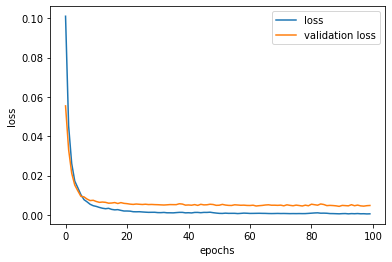

In [ ]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'val')
plt.legend(['loss','validation loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
model_2.compile(optimizer = 'adam',loss = 'mse')
history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)

1/1 [==============================] - 0s 39ms/step - loss: 0.0060


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
print(rscore_2)

1/1 [==============================] - 0s 79ms/step
0.8654896792031849


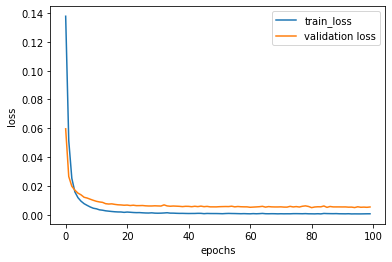

In [ ]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'val')
plt.legend(['train_loss','validation loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


In [ ]:
model_3.compile(optimizer = 'adam',loss = 'mse')
history = model_3.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_3.evaluate(x_test , y_test)

1/1 [==============================] - 0s 149ms/step - loss: 0.0076


In [ ]:
y_pred_3 = model_3.predict(x_test)
rscore_3 = r2_score(y_test , y_pred_3)
print(rscore_3)

1/1 [==============================] - 0s 203ms/step
0.8309632912813673


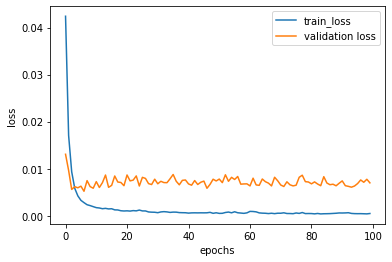

In [ ]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'val')
plt.legend(['train_loss','validation loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


# Different losses and optimizers for Model 2

In [ ]:
model_2.compile(optimizer = 'adam',loss = 'mae')
history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)

1/1 [==============================] - 0s 41ms/step - loss: 0.0603


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
print(rscore_2)

1/1 [==============================] - 0s 108ms/step
0.7997601653708146


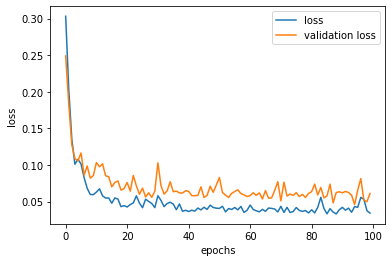

In [ ]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'val')
plt.legend(['loss','validation loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

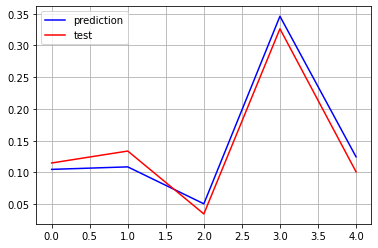

In [ ]:
import random
random_pred=list()
random_test=list()
for i in range(5):
  j=random.randint(0,len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test[i])
  
plt.plot(random_pred,'b',label='prediction')
plt.plot(random_test,'r',label='test')
plt.legend()
plt.grid()

In [ ]:
model_2.compile(optimizer = 'sgd',loss = 'mse')
history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.0132


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
print(rscore_2)

1/1 [==============================] - 0s 61ms/step
0.7048276619140725


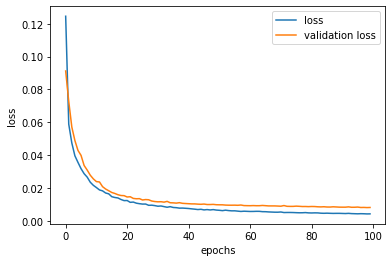

In [ ]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'val')
plt.legend(['loss','validation loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

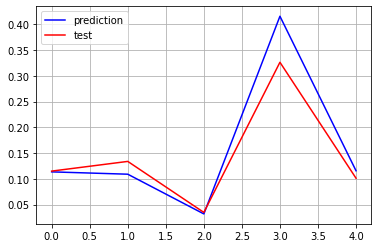

In [ ]:
random_pred=list()
random_test=list()
for i in range(5):
  j=random.randint(0,len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test[i])
  
plt.plot(random_pred,'b',label='prediction')
plt.plot(random_test,'r',label='test')
plt.legend()
plt.grid()

In [ ]:
model_2.compile(optimizer = 'sgd',loss = 'mae')
history = model_2.fit(x_train ,y_train ,validation_split=0.2 ,epochs = 100,batch_size = 10,verbose = 0)
loss = model_2.evaluate(x_test , y_test)

1/1 [==============================] - 0s 106ms/step - loss: 0.0839


In [ ]:
y_pred_2 = model_2.predict(x_test)
rscore_2 = r2_score(y_test , y_pred_2)
print(rscore_2)

1/1 [==============================] - 0s 63ms/step
0.7156432239916828


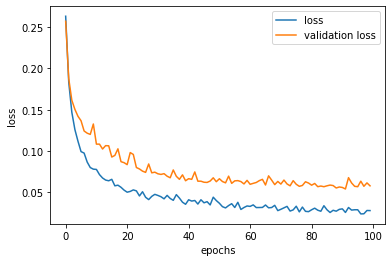

In [ ]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'val')
plt.legend(['loss','validation loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

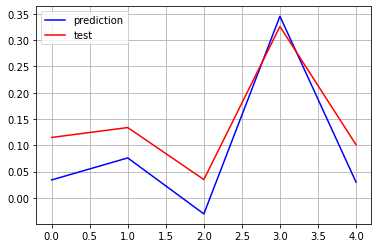

In [ ]:
import random
random_pred=list()
random_test=list()
for i in range(5):
  j=random.randint(0,len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test[i])
  
plt.plot(random_pred,'b',label='prediction')
plt.plot(random_test,'r',label='test')
plt.legend()
plt.grid()

# Pridiction

In [ ]:
a = maximum - minimum
y_pred_true =a*(y_pred_2)
y_pred_true_1 = y_pred_true + minimum

Text(0, 0.5, 'output')

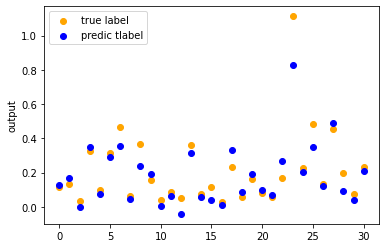

In [ ]:
plt.scatter(range(len(y_test)),y_test,color = "orange")
plt.scatter(range(len(y_test)),y_pred_2,color = "blue")
plt.legend(['true label' , 'predic tlabel'])
plt.ylabel("output")


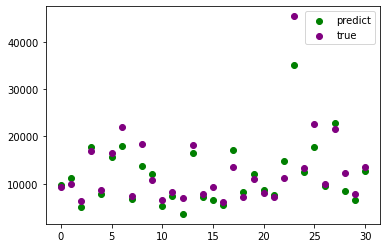

In [ ]:
plt.scatter(range(len(y_test)),y_pred_true_1,color = 'green')
plt.scatter(range(len(y_test)),y_test_1, color = 'purple')
plt.legend(["predict" , "true"])


In [ ]:
y_test_1 = y_test_1.values
for i in range(31):
  a = y_pred_true_1[i]
  b = y_test_1[i]


In [ ]:
l = []
for i in range(31):
  a = y_pred_true_1[i]
  b = y_test_1[i]
  c = b - a
  l.append(c)

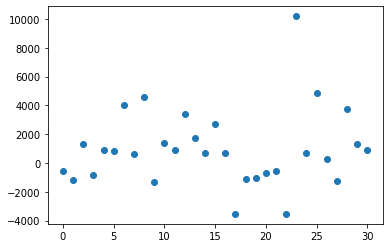

In [ ]:
plt.scatter(range(len(y_test)),l)

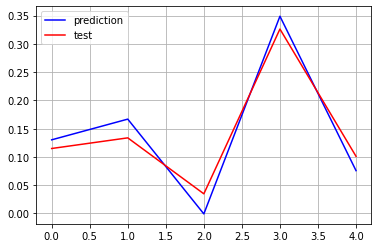

In [ ]:
import random
random_pred=list()
random_test=list()
for i in range(5):
  j=random.randint(0,len(y_pred_2))
  random_pred.append(y_pred_2[i])
  random_test.append(y_test[i])
  
plt.plot(random_pred,'b',label='prediction')
plt.plot(random_test,'r',label='test')
plt.legend()
plt.grid()

In [ ]:
a=[]
for i in range(5):
    a.append(random.randint(0,1798))

In [ ]:
for i in range(len(a)):
    print('pridicted',y_pred_2[i],'actual:',y_test[i])

pridicted [0.13029253] actual: [0.11495428]
pridicted [0.1668987] actual: [0.13376799]
pridicted [-0.00074226] actual: [0.03478189]
pridicted [0.34885004] actual: [0.32618725]
pridicted [0.07579116] actual: [0.10111335]
